In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from astropy.stats import sigma_clipped_stats

In [2]:
df_ceers = pd.read_csv('../cutouts_ceers/catalog.csv')
df_ceers

,ID,FIELD,RA,DEC,z_mean,AB115,AB150,AB200,AB277,AB356,...,FLUX_277,FLUX_356,FLUX_410,FLUX_444,FLUX_606,FLUX_814,FLUX_105,FLUX_125,FLUX_140,FLUX_160
0,3,1,215.034009,52.986189,0.290998,20.094466,19.692365,19.392184,19.564971,19.935978,...,54201.525664,38513.120249,44095.709251,39960.208515,7585.476803,17015.901171,0.0,33642.108438,3.805391e+04,44242.591157
1,122,1,214.929367,52.965049,0.306588,18.989539,18.727832,18.562784,18.775788,19.310682,...,112120.416081,68505.776823,70760.557158,66568.534913,34881.988658,60641.555603,0.0,95393.474204,1.029392e+05,112377.643110
2,168,1,214.918392,52.957740,0.373215,22.379111,22.243714,22.164716,22.295961,22.831174,...,4381.426870,2676.273572,2359.392676,2444.180791,2244.109736,3211.861237,0.0,3931.430039,4.339430e+03,4310.543300
3,223,1,214.942718,52.973940,0.571436,20.196199,19.934903,19.699136,19.473676,19.836993,...,58956.234459,42189.329321,33261.853249,32204.456764,9081.797710,18975.322881,0.0,29715.224480,3.366302e+04,37909.039076
4,228,1,214.926492,52.963108,0.764641,22.871076,22.821703,22.715424,22.570187,22.790309,...,3403.494736,2778.922710,2329.938824,2104.311181,1056.539525,1988.593375,0.0,2460.921260,2.448424e+03,2553.164103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,101089,10,214.866472,52.766706,0.466082,23.441369,23.305123,23.214276,23.217518,23.721987,...,1874.963907,1178.162061,1037.206903,1008.682195,718.792172,1193.350260,0.0,1532.776749,-1.179402e-33,1650.375777
902,101298,10,214.892175,52.783670,0.620438,22.249950,22.131283,21.991648,21.791062,22.126381,...,6975.495597,5122.095987,4146.682004,4049.227752,2147.074139,3469.897408,0.0,4146.235258,2.778393e-12,4684.408075
903,101365,10,214.889586,52.781789,0.569069,23.411952,23.238060,23.167866,23.076813,23.457918,...,2134.394223,1502.562946,1318.259948,1255.275279,572.698652,1093.063304,0.0,1515.644024,-5.278027e-13,1848.620195
904,101373,10,214.880378,52.774835,0.384050,23.309243,23.234000,23.184913,23.350707,23.829497,...,1658.506277,1067.090018,911.956757,851.134653,1197.699555,1478.800049,0.0,1655.334118,1.696844e+03,1704.996791


In [3]:
# result_files = glob.glob('galaxy_only/*.csv')
result_files = glob.glob('full_sim_ver2/*.csv')
df = pd.DataFrame()
for path in result_files:
    _df = pd.read_csv(path,index_col=0).T
    df = pd.concat([df,_df])
cols = df.columns.values

# convert to float
for col in cols[1:]:
    df[col] = df[col].astype(float)
    
# get galaxy ID
df['CEERS_ID'] = df['test_ID'].apply(lambda x: x.split('_')[0])

print(df.shape)
df.head()

(3055, 28)


,test_ID,sphot_F555W,sphot_F814W,sphot_F150W,sphot_F160W,sphot_F277W,dAB_F555W,dAB_F814W,dAB_F150W,dAB_F160W,...,bkg_std_F150W,bkg_std_F160W,bkg_std_F277W,r_eff,n,x_0,y_0,ellip,theta,CEERS_ID
0,test1235_96130_496,22.485835,20.760728,19.188366,19.306593,18.618918,0.016516,-0.105817,-0.247753,-0.187165,...,0.097708,0.068847,0.048249,21.226608,4.597978,119.930326,126.153443,0.000031,3.007220,test1235
0,test5094_21213_414,23.979002,23.198892,22.556449,22.711395,22.169710,-0.428087,-0.361714,-0.491047,-0.380674,...,0.025259,0.023087,0.013651,14.250540,2.481660,128.666770,129.304733,0.533126,0.715070,test5094
0,test5230_62950_146,23.259634,22.477009,21.470884,21.725087,21.333153,0.171827,0.100919,-0.202970,-0.045821,...,0.041498,0.027192,0.019008,19.079149,1.594149,126.384157,127.766155,0.364584,3.130060,test5230
0,test5909_23429_359,24.205707,23.375094,22.650312,22.615320,22.166986,0.639650,0.538647,0.432040,0.334692,...,0.106722,0.079290,0.057063,8.776614,5.042911,127.757951,127.754090,0.519233,1.549230,test5909
0,test3676_9714_026,25.792828,24.527797,22.900290,25.488586,23.661887,1.328576,1.079702,0.094187,2.554647,...,0.069698,0.052959,0.033131,13.138435,5.195643,151.263026,135.805093,0.675602,1.718112,test3676


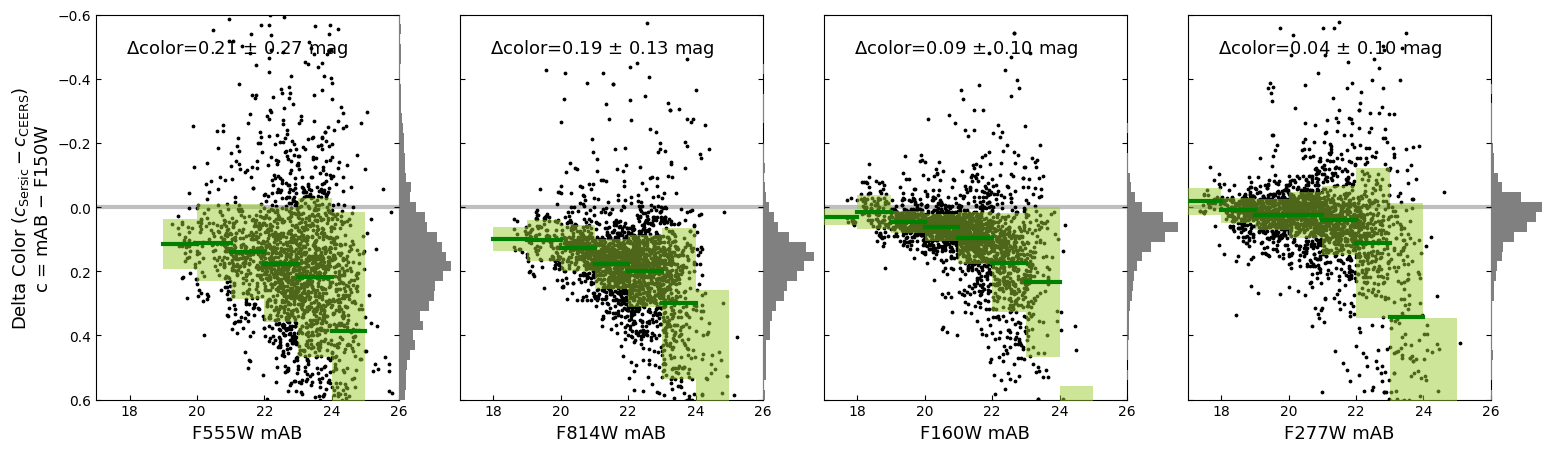

In [4]:
# mag vs. delta color
filters = ['F555W','F814W','F160W','F277W']
filt_ref = 'F150W'
fig,axes = plt.subplots(1,4,figsize=(18,5))
plt.subplots_adjust(wspace=0.2)

s = (df['dAB_F150W'] > -1.) & (df['dAB_F150W'] < 1.)
for filt,ax in zip(filters,axes):
    mag = df[f'sphot_{filt}']
    delta_color = df[f'dAB_{filt}'] - df[f'dAB_{filt_ref}']

    ax.scatter(mag[s],delta_color[s],c='k',s=3)
    mean,median,std = sigma_clipped_stats(delta_color[s],sigma=3.5)
    ax.text(0.1,0.9,fr'Δcolor={mean:.2f} $\pm$ {std:.2f} mag',
            transform=ax.transAxes,fontsize=13)
    for mag_bin_lower in np.arange(17,26,1): 
        xlim = ax.get_xlim()
        xlim_rng = xlim[1]-xlim[0]
        s2 = (mag > mag_bin_lower) & (mag <= mag_bin_lower + 1)
        if (s&s2).sum() > 10:
            mean,median,std = sigma_clipped_stats(delta_color[s&s2],sigma=3.5)
            ax.plot([mag_bin_lower,mag_bin_lower+1],[mean,mean],c='g',ls='-',lw=3,zorder=4)
            ax.fill_between([mag_bin_lower,mag_bin_lower+1],mean-std,mean+std,color='yellowgreen',alpha=0.5,zorder=3,lw=0)
    ax.set_xlabel(f'{filt} mAB',fontsize=13)


    ax.set_xlim(17,26)
    ax.tick_params(direction='in')
    ax.set_ylim(0.6,-0.6)
    ax.axhline(0,c='gray',lw=3,alpha=0.5,zorder=0)
    
    ax_loc = ax.get_position().bounds
    ax_hist = fig.add_axes([ax_loc[0]+ax_loc[2],ax_loc[1],0.03,ax_loc[3]],frameon=False)
    ax_hist.hist(delta_color[s],bins=np.linspace(*ax.get_ylim()[::-1],40),orientation='horizontal',color='gray')
    ax_hist.set_ylim(ax.get_ylim())
    ax_hist.set_xticks([])
    ax_hist.set_yticklabels([])

axes[0].set_ylabel(r'Delta Color ($c_\mathrm{Sersic} - c_\mathrm{CEERS}$)'+\
                    '\n'+r'c = mAB $-$ F150W',fontsize=13)

for ax in axes[1:]:
    ax.set_yticklabels([])
    
# for ax in axes:



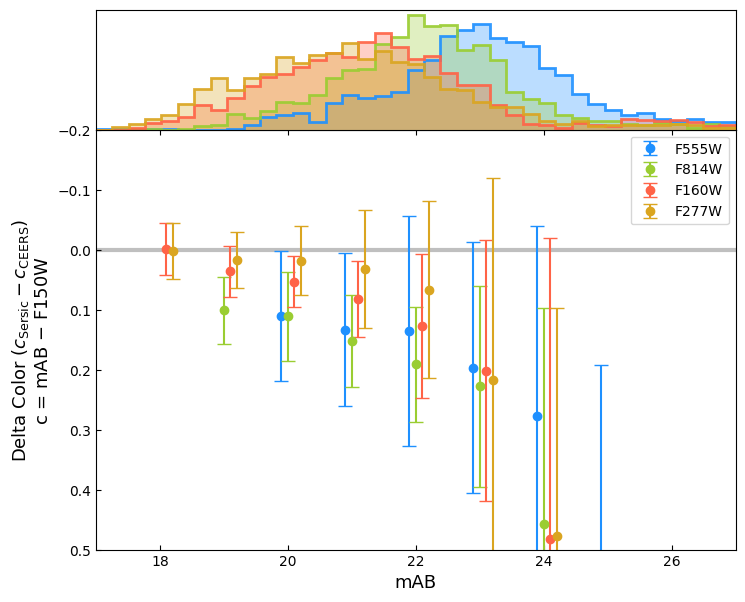

In [5]:
# mag vs. delta color
# filters = ['F814W','F160W','F277W']
colors = ['dodgerblue','yellowgreen','tomato','goldenrod']
filt_ref = 'F150W'
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0.1,0.1,0.8,0.7])
ax_top = fig.add_axes([0.1,0.8,0.8,0.2])

for i,(filt,c) in enumerate(zip(filters,colors)):
    mag = df[f'sphot_{filt}']
    delta_color = df[f'dAB_{filt}'] - df[f'dAB_{filt_ref}']

    means,errors = [],[]
    mag_bins = []
    for mag_bin_lower in np.arange(17-0.5,27-0.5,1): 
        s = (mag > mag_bin_lower) & (mag <= mag_bin_lower + 1) & (df['dAB_F150W'] > -1.) & (df['dAB_F150W'] < 1.)
        if s.sum() > 10:
            mean,median,std = sigma_clipped_stats(delta_color[s],sigma=4)
            mag_bins.append(mag_bin_lower)
            means.append(mean)
            errors.append(std)
    ax.errorbar(np.array(mag_bins)+0.4+i*0.1,means,yerr=errors,color=c,fmt='o',capsize=5,label=filt)
    ax_top.hist(mag,bins=np.linspace(17,27,40),color=c,alpha=0.9,histtype='step',lw=2)
    ax_top.hist(mag,bins=np.linspace(17,27,40),color=c,alpha=0.3)

ax_top.set_xticklabels([])
ax_top.set_yticks([])
ax.set_xlabel(f'mAB',fontsize=13)
ax.set_ylabel(r'Delta Color ($c_\mathrm{Sersic} - c_\mathrm{CEERS}$)'+\
                    '\n'+r'c = mAB $-$ F150W',fontsize=13)
ax.legend()
ax_top.set_xlim(17,27)
ax.set_xlim(17,27)
ax.tick_params(direction='in')
ax.set_ylim(0.5,-0.2)
ax.axhline(0,c='gray',lw=3,alpha=0.5,zorder=0)

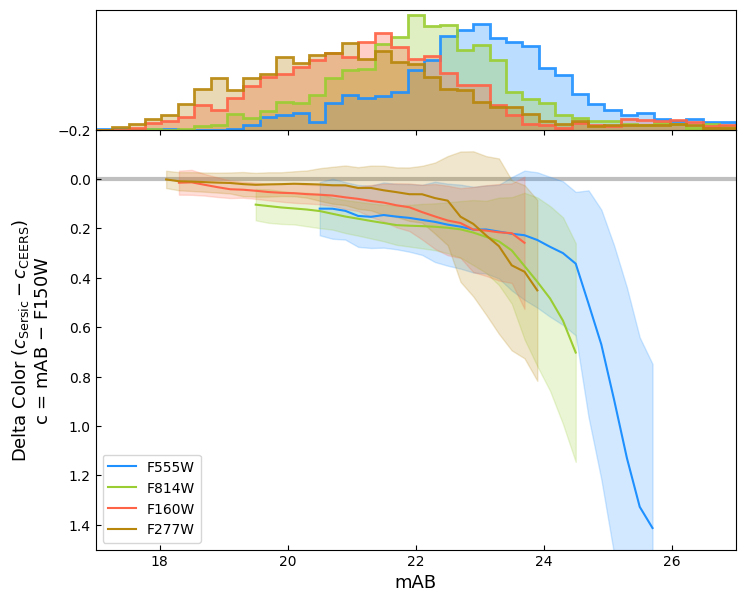

In [6]:
# mag vs. delta color
# filters = ['F814W','F160W','F277W']
colors = ['dodgerblue','yellowgreen','tomato','darkgoldenrod']
filt_ref = 'F150W'
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0.1,0.1,0.8,0.7])
ax_top = fig.add_axes([0.1,0.8,0.8,0.2])

eval_points = np.arange(16.5,26.5,0.2)
eval_width = 0.5 # half of the width of rolling window
sphot_correction_data = {}
for i,(filt,c) in enumerate(zip(filters,colors)):
    mag = df[f'sphot_{filt}']
    delta_color = df[f'dAB_{filt}'] - df[f'dAB_{filt_ref}']

    means,errors = [],[]
    for eval_point in eval_points: 
        # calculate the mean and STD around each evaluation point
        s = (mag > eval_point - eval_width) & (mag <= eval_point + eval_width) & (df['dAB_F150W'] > -1.) & (df['dAB_F150W'] < 1.)
        if s.sum() > 0.03 * len(mag):
            mean,median,std = sigma_clipped_stats(delta_color[s],sigma=3)
        else:
            mean,median,std = np.nan,np.nan,np.nan
        means.append(mean)
        errors.append(std)
    means = np.array(means)
    errors = np.array(errors)

    sphot_correction_data[filt] = dict(
        measured_mag = eval_points,
        mean_bias = means,
        mean_error = errors / np.sqrt(2)
    )
    ax.plot(eval_points,means,color=c,label=filt)
    ax.fill_between(eval_points,means-errors,means+errors,color=c,alpha=0.2)
    ax_top.hist(mag,bins=np.linspace(17,27,40),color=c,alpha=0.9,histtype='step',lw=2)
    ax_top.hist(mag,bins=np.linspace(17,27,40),color=c,alpha=0.3)

ax_top.set_xticklabels([])
ax_top.set_yticks([])
ax.set_xlabel(f'mAB',fontsize=13)
ax.set_ylabel(r'Delta Color ($c_\mathrm{Sersic} - c_\mathrm{CEERS}$)'+\
                    '\n'+r'c = mAB $-$ F150W',fontsize=13)
ax.legend()
ax_top.set_xlim(17,27)
ax.set_xlim(17,27)
ax.tick_params(direction='in')
ax.set_ylim(1.5,-0.2)
ax.axhline(0,c='gray',lw=3,alpha=0.5,zorder=0)

In [9]:
import h5py

with h5py.File('sphot_correction_data.h5', 'w') as f:
    for filt, data in sphot_correction_data.items():
        g = f.create_group(filt)
        for k, v in data.items():
            g.create_dataset(k, data=v)

In [ ]:
print('hi')

(0.0, 0.4733854766145434)

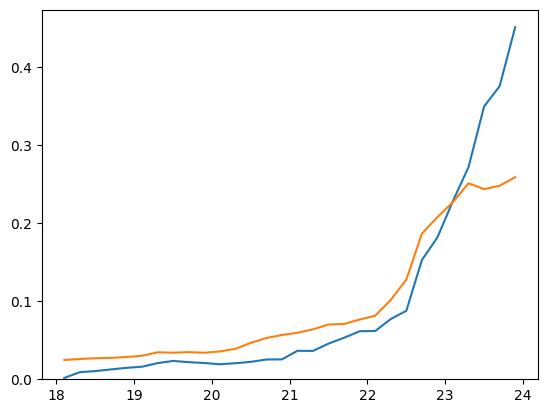

In [32]:
# sphot_correction_data
filt = 'F277W'
corr_mag = sphot_correction_data[filt]['measured_mag']
mean_bias = sphot_correction_data[filt]['mean_bias']
mean_error = sphot_correction_data[filt]['mean_error']

plt.plot(corr_mag,mean_bias)
plt.plot(corr_mag,mean_error)
plt.ylim(0,)

In [1]:
# mag vs. delta color
# filters = ['F814W','F160W','F277W']
colors = ['dodgerblue','yellowgreen','tomato','goldenrod']
filt_ref = 'F150W'
fig,ax = plt.subplots(1,1,figsize=(8,6))

percentile_lower = 70
percentile_upper = 90
for i,(filt,c) in enumerate(zip(filters,colors)):
    mag = df[f'sphot_{filt}']
    delta_color = df[f'dAB_{filt}'] - df[f'dAB_{filt_ref}']
    bkg_mean = df[f'bkg_mean_{filt}']
    means,errors = [],[]
    mag_bins = []
    for mag_bin_lower in np.arange(17-0.5,27-0.5,1): 
        s = (mag > mag_bin_lower) & (mag <= mag_bin_lower + 1) & (df['dAB_F150W'] > -1.) & (df['dAB_F150W'] < 1.)
        s = s & (np.percentile(bkg_mean,percentile_lower) < bkg_mean)
        s = s & (bkg_mean < np.percentile(bkg_mean,percentile_upper))
        if s.sum() > 10:
            mean,median,std = sigma_clipped_stats(delta_color[s],sigma=5)
            mag_bins.append(mag_bin_lower)
            means.append(mean)
            errors.append(std)
    ax.errorbar(np.array(mag_bins)+0.4+i*0.1,means,yerr=errors,color=c,fmt='o',capsize=5,label=filt)

ax.set_xlabel(f'mAB',fontsize=13)
ax.set_ylabel(r'Delta Color ($c_\mathrm{Sersic} - c_\mathrm{CEERS}$)'+\
                    '\n'+r'c = mAB $-$ F150W',fontsize=13)
plt.legend()

ax.set_xlim(17,27)
ax.tick_params(direction='in')
ax.set_ylim(0.5,-0.3)
ax.axhline(0,c='gray',lw=3,alpha=0.5,zorder=0)

NameError: name 'plt' is not defined

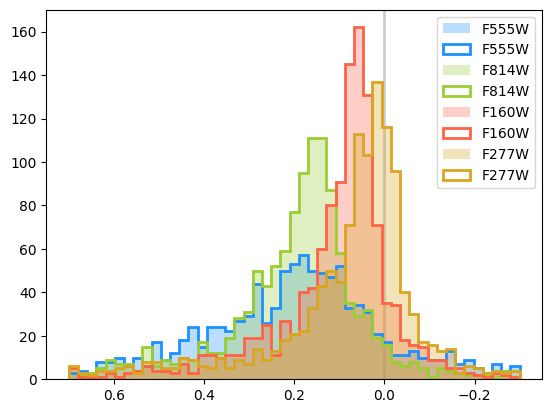

In [29]:
bins = np.linspace(-0.3,0.7,50)
# colors = ['dodgerblue','yellowgreen','tomato']
for filt,c in zip(filters,colors):
    delta_color = df[f'dAB_{filt}'] - df[f'dAB_{filt_ref}']
    plt.hist(delta_color,alpha=0.3,bins=bins,label=filt,color=c,zorder=1)
    plt.hist(delta_color,alpha=1,bins=bins,label=filt,color=c,zorder=2,histtype='step',lw=2)
    mean,median,std = sigma_clipped_stats(delta_color)
    # plt.axvline(mean,lw=2,c=c,ls='--',zorder=2)
plt.axvline(0,color='gray',lw=2,zorder=0,ls='-',alpha=0.4)
plt.legend()
plt.gca().invert_xaxis()

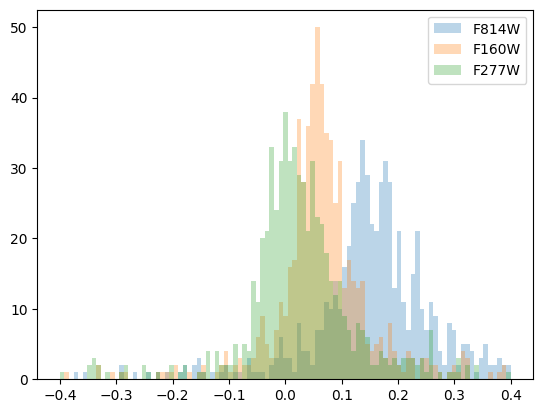

In [7]:
bins = np.linspace(-0.4,0.4,100)
for filt in filters:
    delta_color = df[f'dAB_{filt}'] - df[f'dAB_{filt_ref}']
    plt.hist(delta_color,alpha=0.3,bins=bins,label=filt)
plt.legend()

/tmp/ipykernel_722997/1037399526.py:15: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  lg.legendHandles[i]._sizes = [30]


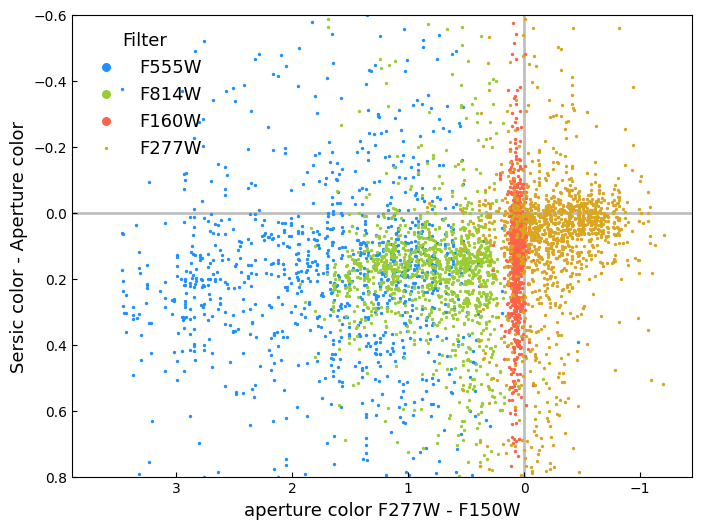

In [30]:
# color vs delta_color
# colors = ['dodgerblue','yellowgreen','tomato']
fig,ax = plt.subplots(1,1,figsize=(8,6))

for filt,c in zip(filters,colors):
    mag_true = df[f'sphot_{filt}'] - df[f'dAB_{filt}']
    mag_ref_true = df[f'sphot_{filt_ref}'] - df[f'dAB_{filt_ref}']
    color = mag_true - mag_ref_true
    delta_color = df[f'dAB_{filt}'] - df[f'dAB_{filt_ref}']
    plt.scatter(color,delta_color,c=c,s=2,label=filt)
lg = plt.legend(frameon=False,fontsize=13,title='Filter',loc='upper left')
lg.get_title().set_fontsize(13)

for i in range(3):
    lg.legendHandles[i]._sizes = [30]
    
ax.set_xlabel(f'aperture color {filt} - {filt_ref}',fontsize=13)
ax.set_ylabel('Sersic color - Aperture color',fontsize=13)
ax.tick_params(direction='in')
ax.set_ylim(0.8,-0.6)
ax.invert_xaxis()
ax.axhline(0,c='gray',lw=2,alpha=0.5,zorder=0)
ax.axvline(0,c='gray',lw=2,alpha=0.5,zorder=0)